# ME5413 Homework 3: Planning

## Task 0: Load the Map

In [26]:
import heapq
import time
import matplotlib.cm as cm
import itertools
import numpy as np
import imageio
import matplotlib.pyplot as plt
import random
import math

Size of the map: (1000, 1000)
Occupied Cells: 823039
Free Cells: 176961


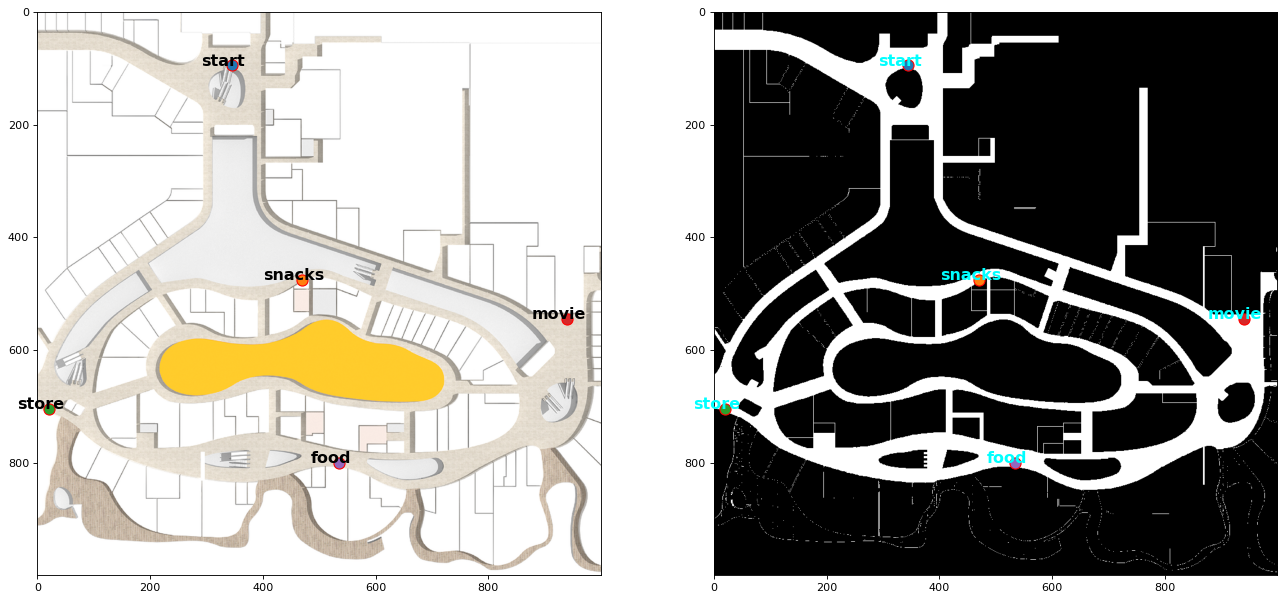

Cell start is free: False
Cell snacks is free: True
Cell store is free: False
Cell movie is free: False
Cell food is free: False


In [27]:
# Load the map
# Load the original floor plan image (for visualization purposes)
floor_plan = imageio.v2.imread('./map/vivocity.png')
# Load the binary free-space map (0 = obstacle, 255 = free space)
grid_map_img = imageio.v2.imread('./map/vivocity_freespace.png')
# Transpose the map to match (x, y) coordinate access
grid_map = grid_map_img.transpose()
# Print the size of the map (in grid cells)
print("Size of the map:", grid_map.shape)
# Count the number of occupied (obstacle) cells
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
# Count the number of free cells
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        # Plot a red circle at the location
        plt.plot(locations[key][0],locations[key][1],  marker="o", markersize=10, markeredgecolor="red")
         # Write the label slightly to the left of the point
        plt.text(locations[key][0]-15,locations[key][1],  s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# Plot the locaitons on the map 
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
plt.show()

# Check if the designated locations are free
for key, value in locations.items():
    print(f"Cell {key} is free: {grid_map[value[1], value[0]] == 255}")
    
    
# Inflate obstacles to account for robot's physical size (collision avoidance)
def inflate_obstacles(map_data, robot_radius=0.3, cell_size=MAP_RES):
    # Make a copy of the original map to avoid modifying it directly
    inflated_map = map_data.copy()
    # Get the number of rows and columns in the map
    rows, cols = map_data.shape
     # Calculate how many cells to inflate around each obstacle based on robot's radius
    inflation_cells = int(np.ceil(robot_radius / cell_size))
    # Loop through all cells in the map
    for i in range(rows):
        for j in range(cols):
            # If the cell is an obstacle
            if map_data[i, j] == 0:
                # Inflate all neighboring cells within the inflation range
                for di in range(-inflation_cells, inflation_cells + 1):
                    for dj in range(-inflation_cells, inflation_cells + 1):
                        ni, nj = i + di, j + dj
                        # Make sure the new cell is within map bounds
                        if 0 <= ni < rows and 0 <= nj < cols:
                            # Mark it as obstacle
                            inflated_map[ni, nj] = 0
    return inflated_map

## Task 1


Using euclidean heuristic:
Distance Table (meters):
From   | start | snacks | store | movie | food
-------|-------|--------|-------|-------|------
start  |   0.0 | 143.8 | 155.6 | 179.1 | 225.4 | 
snacks | 143.8 |   0.0 | 115.4 | 108.3 | 135.0 | 
store  | 155.6 | 115.4 |   0.0 | 210.1 | 111.1 | 
movie  | 179.1 | 108.3 | 210.1 |   0.0 | 113.8 | 
food   | 225.4 | 135.0 | 111.1 | 113.8 |   0.0 | 


C:\Users\Administrator\AppData\Local\Temp\ipykernel_60844\1242824596.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(all_paths)) # use colormap for different paths


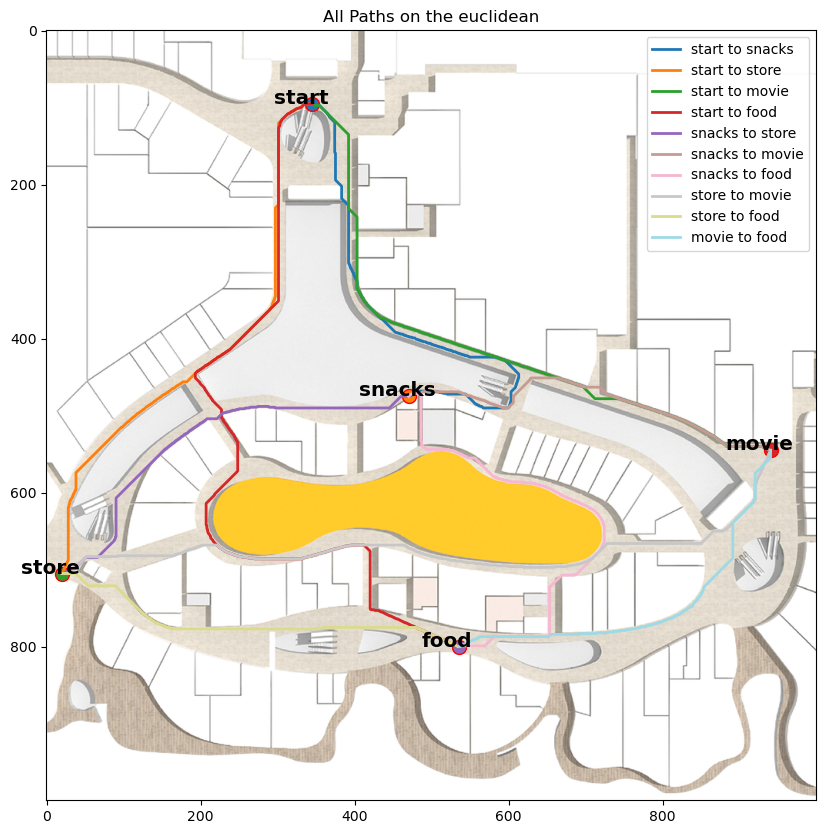


Using manhattan heuristic:
Distance Table (meters):
From   | start | snacks | store | movie | food
-------|-------|--------|-------|-------|------
start  |   0.0 | 143.8 | 155.6 | 179.1 | 225.8 | 
snacks | 143.8 |   0.0 | 119.7 | 108.3 | 135.0 | 
store  | 158.2 | 115.4 |   0.0 | 210.1 | 111.1 | 
movie  | 179.1 | 108.3 | 210.1 |   0.0 | 114.7 | 
food   | 225.8 | 135.0 | 111.1 | 114.7 |   0.0 | 


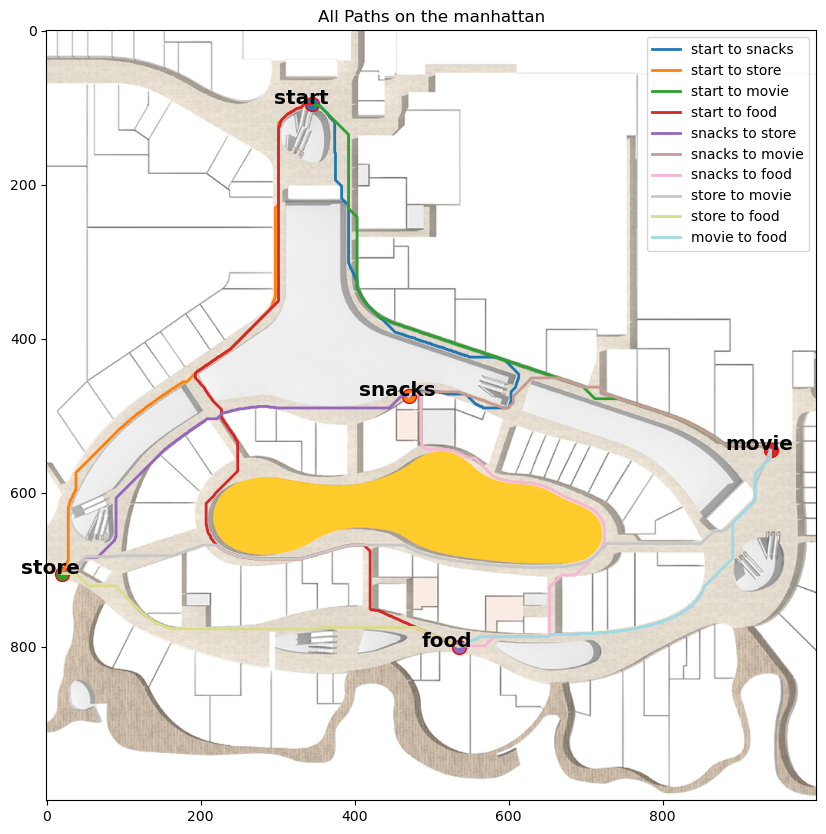


Using diagonal heuristic:
Distance Table (meters):
From   | start | snacks | store | movie | food
-------|-------|--------|-------|-------|------
start  |   0.0 | 143.8 | 155.6 | 179.1 | 225.4 | 
snacks | 143.8 |   0.0 | 115.4 | 108.3 | 135.0 | 
store  | 155.6 | 115.4 |   0.0 | 210.1 | 111.1 | 
movie  | 179.1 | 108.3 | 210.1 |   0.0 | 113.8 | 
food   | 225.4 | 135.0 | 111.1 | 113.8 |   0.0 | 


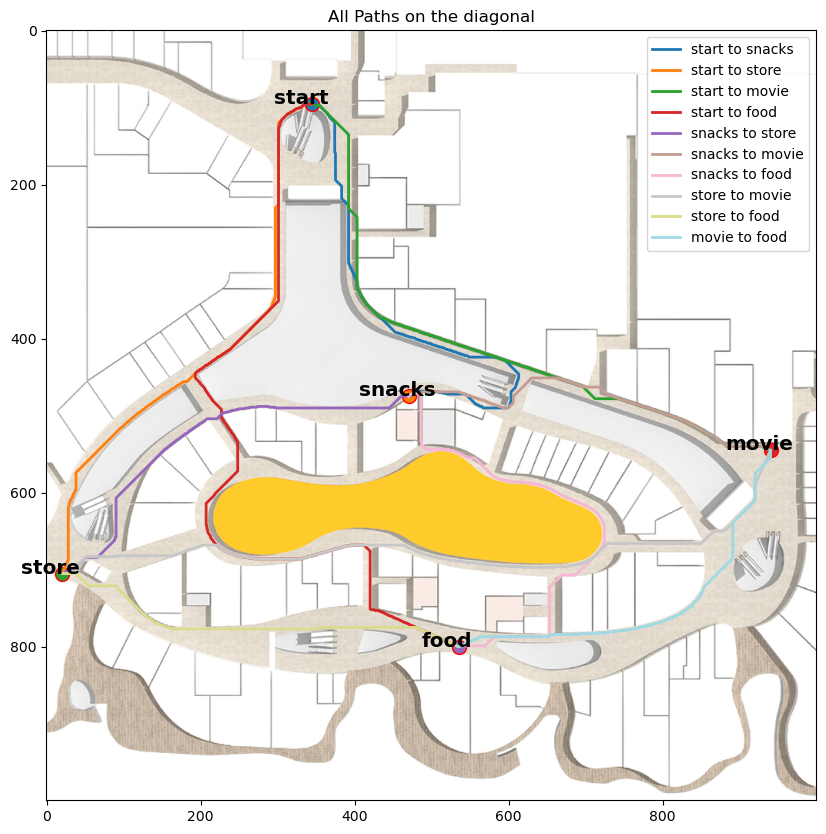


Using custom heuristic:
Distance Table (meters):
From   | start | snacks | store | movie | food
-------|-------|--------|-------|-------|------
start  |   0.0 | 143.8 | 155.6 | 179.1 | 225.4 | 
snacks | 143.8 |   0.0 | 115.4 | 108.3 | 135.0 | 
store  | 155.6 | 115.4 |   0.0 | 210.1 | 111.1 | 
movie  | 179.1 | 108.3 | 210.1 |   0.0 | 113.8 | 
food   | 225.4 | 135.0 | 111.1 | 113.8 |   0.0 | 


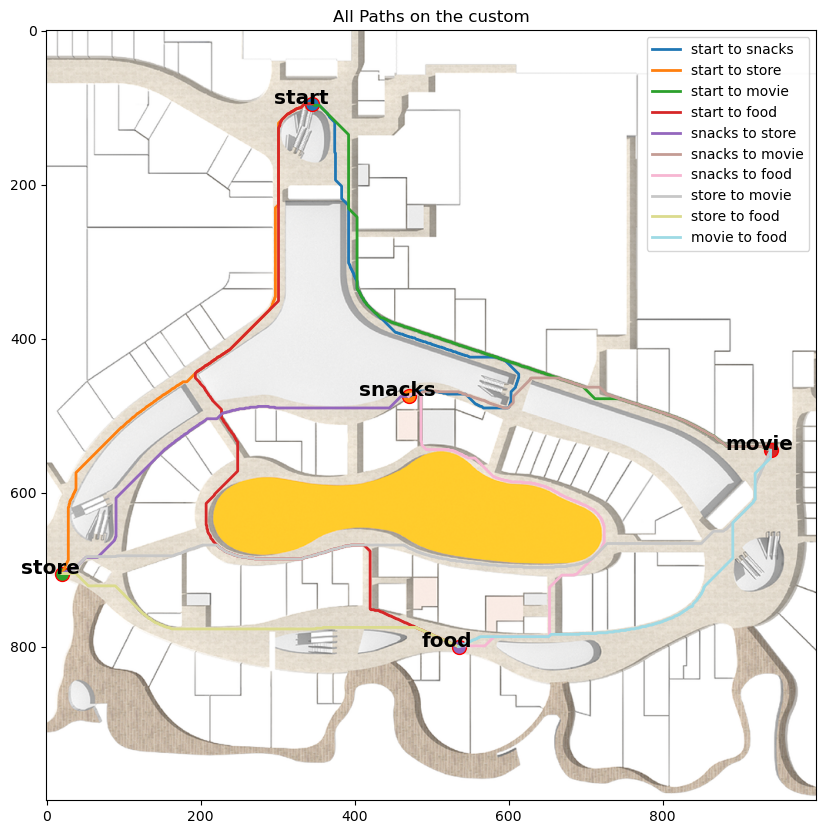


Using dij heuristic:
Distance Table (meters):
From   | start | snacks | store | movie | food
-------|-------|--------|-------|-------|------
start  |   0.0 | 143.8 | 155.6 | 179.1 | 225.4 | 
snacks | 143.8 |   0.0 | 115.4 | 108.3 | 135.0 | 
store  | 155.6 | 115.4 |   0.0 | 210.1 | 111.1 | 
movie  | 179.1 | 108.3 | 210.1 |   0.0 | 113.8 | 
food   | 225.4 | 135.0 | 111.1 | 113.8 |   0.0 | 


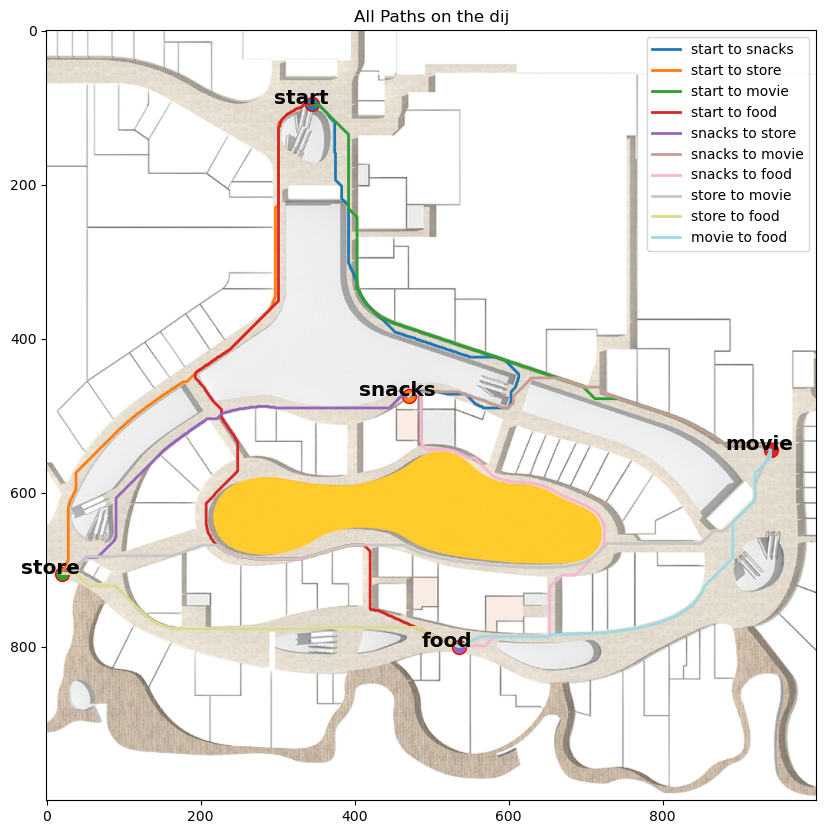

In [28]:
# Define 8 neighboring directions: up, down, left, right, and four diagonals
# Each direction is associated with a movement cost (in meters)
neighbors = [(-1, 0, 0.2), (1, 0, 0.2), (0, -1, 0.2), (0, 1, 0.2),
             (-1, -1, 0.282), (-1, 1, 0.282), (1, -1, 0.282), (1, 1, 0.282)]
# Heuristic function used to estimate the cost from a node to the goal
def heuristic(a, b, heuristic_type="euclidean", cell_size=MAP_RES):
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])
    if heuristic_type == "euclidean":
        # Euclidean distance (straight-line distance)
        return cell_size * np.sqrt(dx**2 + dy**2)
    elif heuristic_type == "manhattan":
        # Manhattan distance (grid-based movement: only horizontal and vertical)
        return cell_size * (dx + dy)
    elif heuristic_type == "diagonal":
        # Diagonal distance (combines straight and diagonal moves)
        return cell_size * (max(dx, dy) + (np.sqrt(2) - 1) * min(dx, dy))
    elif heuristic_type == "custom":
        # Custom heuristic (encourages diagonal movement even more)
        return cell_size * (dx + dy + (np.sqrt(2) - 2) * min(dx, dy))
    else:
        # Dijkstra heuristic (equivalent to h(n) = 0, i.e., no heuristic used)
        return 0
# A* pathfinding algorithm implementation
def a_star(map_data, start, goal, heuristic_type="euclidean"):
    rows, cols = map_data.shape
    open_list = [] # priority queue storing (f_cost, node)
    heapq.heappush(open_list, (0, start))   # start node with initial f_cost = 0
    came_from = {}  # start node with initial f_cost = 0
    g_cost = {start: 0} # actual cost from start to each node
    f_cost = {start: heuristic(start, goal, heuristic_type)}  # total estimated cost (g + h) 
    visited = set()  # set to track visited nodes

    start_time = time.time() # start timer
    while open_list:
        current = heapq.heappop(open_list)[1] # start timer
        # If goal is reached, reconstruct and return the path
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            runtime = time.time() - start_time
            return path, g_cost[goal], visited, runtime

        visited.add(current)
        # Expand neighbors of the current node
        for di, dj, cost in neighbors:
            neighbor = (current[0] + di, current[1] + dj)
             # Check if neighbor is within map bounds and in free space
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and 
                map_data[neighbor] == 255 and neighbor not in visited):
                # Calculate tentative cost to reach this neighbor
                tentative_g_cost = g_cost[current] + cost
                # Update path if this is a better (lower cost) route
                if neighbor not in g_cost or tentative_g_cost < g_cost[neighbor]:
                    came_from[neighbor] = current
                    g_cost[neighbor] = tentative_g_cost
                    f_cost[neighbor] = tentative_g_cost + heuristic(neighbor, goal, heuristic_type)
                    heapq.heappush(open_list, (f_cost[neighbor], neighbor))
    # If goal not reached and open_list is empty, return failure
    runtime = time.time() - start_time
    return None, None, visited, runtime
# Compute pairwise distances between all specified locations using a pathfinding algorithm
def compute_all_distances(map_data, locations, al_method, heuristic_type="euclidean"):
    distance_table = {}
    for start_name, start_pos in locations.items():
        distance_table[start_name] = {}
        for goal_name, goal_pos in locations.items():
            if start_name == goal_name:
                distance_table[start_name][goal_name] = 0.0 # distance to itself is zero
            else: # Run pathfinding between each pair
                path, distance, visited, runtime = al_method(map_data, tuple(start_pos), tuple(goal_pos), heuristic_type=heuristic_type)
                if path:
                    distance_table[start_name][goal_name] = distance # convert to meters
                else:
                    distance_table[start_name][goal_name] = float('inf')  # if no path found
    return distance_table
# Visualize the path from start to goal on the map
def plot_path(map_data, path, start, goal, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(map_data, cmap='gray') # show map in grayscale
    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], 'r-', linewidth=2, label='Path') # draw the path
    plt.plot(start[1], start[0], 'go', label='Start') # green = start
    plt.plot(goal[1], goal[0], 'bo', label='Goal') # blue = goal
    plt.title(title)
    plt.legend()
    plt.show()

# Run the A* algorithm using different heuristics and visualize the results
inflated_map = inflate_obstacles(grid_map) # Run the A* algorithm using different heuristics and visualize the results
heuristic_types = ["euclidean","manhattan","diagonal","custom","dij"] # test all heuristics
for h_type in heuristic_types:
    print(f"\nUsing {h_type} heuristic:")
    # Compute the full distance table for all location pairs
    distance_table = compute_all_distances(inflated_map, locations, a_star, heuristic_type=h_type)
    # Print distance table
    print("Distance Table (meters):")
    print("From   | start | snacks | store | movie | food")
    print("-------|-------|--------|-------|-------|------")
    # Compute and store all pairwise paths
    for from_loc in locations:
        row = f"{from_loc:6} | "
        for to_loc in locations:
            row += f"{distance_table[from_loc][to_loc]:5.1f} | "
        print(row)

    location_names = list(locations.keys())
    all_paths = []
    # Compute and store all pairwise paths
    for start_name, goal_name in itertools.combinations(location_names, 2):
        start_pos = tuple(locations[start_name])
        goal_pos = tuple(locations[goal_name])
        path, distance, visited, runtime = a_star(inflated_map, start_pos, goal_pos)
        all_paths.append((path, start_pos,start_name, goal_name))
    # Visualize all paths on top of the floor plan
    plt.figure(figsize=(10, 10))
    plt.imshow(floor_plan, cmap='gray')  # draw floor plan background
    color_map = cm.get_cmap('tab20', len(all_paths)) # use colormap for different paths
    plot_locations(locations) # plot all key locations
    for i, (path, start_pos,start_name, goal_name) in enumerate(all_paths):
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], color=color_map(i), linewidth=2, label=f"{start_name} to {goal_name}")
        plt.legend(loc='upper right')
    plt.title(f"All Paths on the {h_type}")
    plt.show()

Distance Table (meters):
From   | start | snacks | store | movie | food
-------|-------|--------|-------|-------|------
start  |   0.0 | 148.7 | 397.6 | 173.8 | 281.6 | 
snacks | 167.3 |   0.0 | 124.0 | 130.3 | 194.3 | 
store  | 291.7 | 126.6 |   0.0 | 249.4 | 118.0 | 
movie  | 192.7 | 106.8 | 248.1 |   0.0 | 127.4 | 
food   |   inf | 193.1 | 127.4 | 124.2 |   0.0 | 


C:\Users\Administrator\AppData\Local\Temp\ipykernel_60844\3121194988.py:213: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(all_paths))


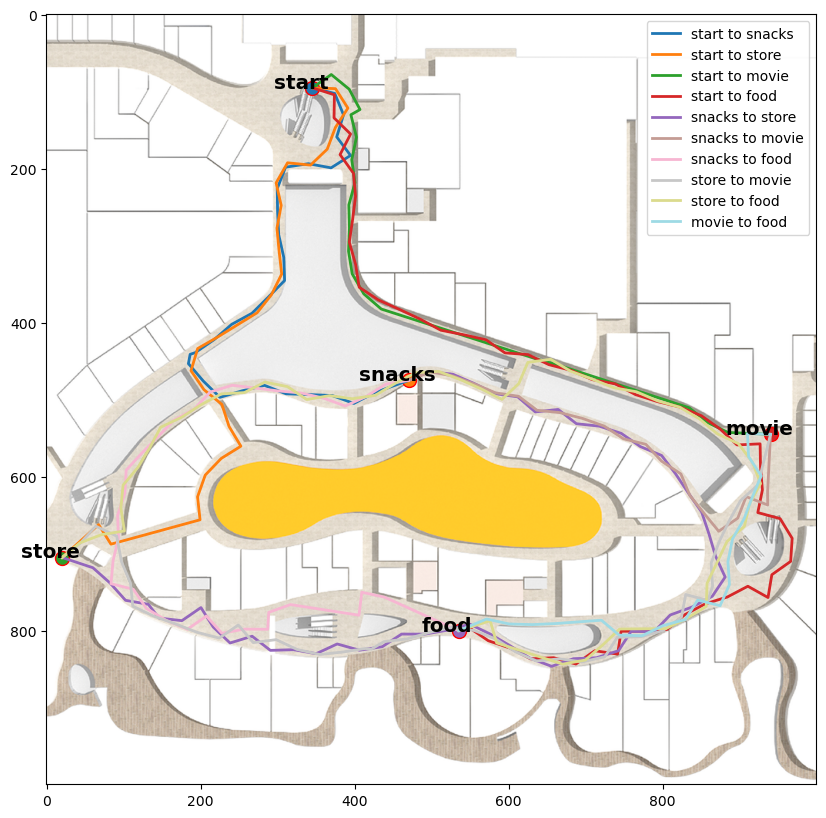

In [29]:
# Define 8 possible movements with their respective costs
neighbors = [
    (-1, 0, 0.2),   # Move up
    (1, 0, 0.2),    # Move down
    (0, -1, 0.2),   # Move left
    (0, 1, 0.2),    # Move right
    (-1, -1, 0.282),# Move diagonally up-left
    (-1, 1, 0.282), # Move diagonally up-right
    (1, -1, 0.282), # Move diagonally down-left
    (1, 1, 0.282)   # Move diagonally down-right
]

# Heuristic function for A* algorithm
def heuristic(a, b, heuristic_type="euclidean", cell_size=MAP_RES):
    dx = abs(a[0] - b[0])  # Difference in x
    dy = abs(a[1] - b[1])  # Difference in y
    if heuristic_type == "euclidean":
        return cell_size * np.sqrt(dx**2 + dy**2)  # Euclidean distance
    elif heuristic_type == "manhattan":
        return cell_size * (dx + dy)  # Manhattan distance
    elif heuristic_type == "diagonal":
        return cell_size * (max(dx, dy) + (np.sqrt(2) - 1) * min(dx, dy))  # Diagonal
    elif heuristic_type == "custom":
        return cell_size * (dx + dy + (np.sqrt(2) - 2) * min(dx, dy))  # Custom
    else:
        return 0  # No heuristic (Dijkstra)

# A* search algorithm
def a_star(map_data, start, goal, heuristic_type="euclidean"):
    rows, cols = map_data.shape
    open_list = []  # Priority queue for nodes to explore
    heapq.heappush(open_list, (0, start))  # Push start node
    came_from = {}  # Stores the optimal path
    g_cost = {start: 0}  # Cost from start to current node
    f_cost = {start: heuristic(start, goal, heuristic_type)}  # Estimated cost from start to goal
    visited = set()  # Set of visited nodes

    start_time = time.time()
    while open_list:
        current = heapq.heappop(open_list)[1]  # Get the node with lowest f-cost
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            runtime = time.time() - start_time
            return path, g_cost[goal], visited, runtime

        visited.add(current)
        for di, dj, cost in neighbors:
            neighbor = (current[0] + di, current[1] + dj)
            # Check bounds and whether the neighbor is walkable
            if (0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and 
                map_data[neighbor] == 255 and neighbor not in visited):
                tentative_g_cost = g_cost[current] + cost
                # If this path to neighbor is better
                if neighbor not in g_cost or tentative_g_cost < g_cost[neighbor]:
                    came_from[neighbor] = current
                    g_cost[neighbor] = tentative_g_cost
                    f_cost[neighbor] = tentative_g_cost + heuristic(neighbor, goal, heuristic_type)
                    heapq.heappush(open_list, (f_cost[neighbor], neighbor))

    runtime = time.time() - start_time
    return None, None, visited, runtime

# Computes pairwise distances using a pathfinding algorithm
def compute_all_distances(map_data, locations, al_method, heuristic_type="euclidean"):
    distance_table = {}
    for start_name, start_pos in locations.items():
        distance_table[start_name] = {}
        for goal_name, goal_pos in locations.items():
            if start_name == goal_name:
                distance_table[start_name][goal_name] = 0.0
            else:
                if heuristic_type is None:
                    path, distance = al_method(map_data, tuple(start_pos), tuple(goal_pos), heuristic_type=heuristic_type)
                else:
                    path, distance, visited, runtime = al_method(map_data, tuple(start_pos), tuple(goal_pos), heuristic_type=heuristic_type)
                if path:
                    distance_table[start_name][goal_name] = distance# Convert cost to meters
                else:
                    distance_table[start_name][goal_name] = float('inf')  # No path found
    return distance_table

# Bresenham's line algorithm to find the line between two points
def bresenham_line(x0, y0, x1, y1):
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy
    current_x = x0
    current_y = y0

    while True:
        points.append((current_x, current_y))
        if current_x == x1 and current_y == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            current_x += sx
        if e2 < dx:
            err += dx
            current_y += sy
    return points

# Check if a line intersects an obstacle
def is_collision(grid_map, start, end):
    x0 = int(round(start[0]))
    y0 = int(round(start[1]))
    x1 = int(round(end[0]))
    y1 = int(round(end[1]))

    line = bresenham_line(x0, y0, x1, y1)

    for (x, y) in line:
        if x < 0 or x >= grid_map.shape[0] or y < 0 or y >= grid_map.shape[1]:
            return True  # Out of bounds
        if grid_map[x, y] == 0:
            return True  # Hit obstacle
    return False

# Compute Euclidean distance between two points
def euclidean_distance(a, b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

# RRT planning algorithm
def rrt(grid_map, start, goal, heuristic_type, max_iter=20000, delta=30.0, goal_bias=0.2):
    start = (float(start[0]), float(start[1]))
    goal = (float(goal[0]), float(goal[1]))

    tree = [{'point': start, 'parent': None, 'cost': 0.0}]  # Initialize tree with start node
    map_height, map_width = grid_map.shape

    for _ in range(max_iter):
        sample = goal if random.random() < goal_bias else (random.uniform(0, map_height-1), random.uniform(0, map_width-1))

        # Find nearest node in tree
        nearest_node = min(tree, key=lambda node: euclidean_distance(node['point'], sample))

        dx, dy = sample[0] - nearest_node['point'][0], sample[1] - nearest_node['point'][1]
        dist = euclidean_distance(nearest_node['point'], sample)
        if dist == 0:
            continue

        step = min(delta, dist)  # Clamp to delta step
        new_point = (nearest_node['point'][0] + dx * (step / dist), nearest_node['point'][1] + dy * (step / dist))

        # Check for collision
        if not is_collision(grid_map, nearest_node['point'], new_point):
            new_cost = nearest_node['cost'] + euclidean_distance(nearest_node['point'], new_point)
            new_node = {'point': new_point, 'parent': nearest_node, 'cost': new_cost}
            tree.append(new_node)

            # Check if goal reached
            if euclidean_distance(new_point, goal) <= delta and not is_collision(grid_map, new_point, goal):
                final_cost = new_cost + euclidean_distance(new_point, goal)
                goal_node = {'point': goal, 'parent': new_node, 'cost': final_cost}
                tree.append(goal_node)
                # Trace path
                path = []
                current_node = goal_node
                while current_node is not None:
                    path.append(current_node['point'])
                    current_node = current_node['parent']
                path.reverse()
                total_cost = final_cost * MAP_RES
                return path, total_cost

    return None, float('inf')  # No path found

# Plotting function for a given path
def plot_path(map_data, path, start, goal, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(map_data, cmap='gray')
    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], 'r-', linewidth=2, label='Path')
    plt.plot(start[1], start[0], 'go', label='Start')
    plt.plot(goal[1], goal[0], 'bo', label='Goal')
    plt.title(title)
    plt.legend()
    plt.show()

# Compute distances using RRT
distance_table = compute_all_distances(inflate_obstacles(grid_map), locations, rrt, heuristic_type=None)

# Display distance table
print("Distance Table (meters):")
print("From   | start | snacks | store | movie | food")
print("-------|-------|--------|-------|-------|------")
for from_loc in locations:
    row = f"{from_loc:6} | "
    for to_loc in locations:
        row += f"{distance_table[from_loc][to_loc]:5.1f} | "
    print(row)

# Plot all unique paths between location pairs
location_names = list(locations.keys())
all_paths = []
for start_name, goal_name in itertools.combinations(location_names, 2):
    start_pos = tuple(locations[start_name])
    goal_pos = tuple(locations[goal_name])
    path, _ = rrt(inflated_map, start_pos, goal_pos, None)
    all_paths.append((path, start_pos, start_name, goal_name))

plt.figure(figsize=(10, 10))
plt.imshow(floor_plan, cmap='gray')
color_map = cm.get_cmap('tab20', len(all_paths))
plot_locations(locations)
for i, (path, start_pos, start_name, goal_name) in enumerate(all_paths):
    path = np.array(path)
    plt.plot(path[:, 0], path[:, 1], color=color_map(i), linewidth=2, label=f"{start_name} to {goal_name}")
    plt.legend(loc='upper right')
plt.show()

## Task 2


Task 2: Travelling Shopper Problem
Brute Force Route: start -> snacks -> store -> food -> movie -> start
Brute Force Total Distance:707.60 meters
Nearest Neighbor Route: start -> snacks -> store -> food -> movie -> start
Nearest Neighbor Total Distance:707.60 meters

Comparison:
Nearest Neighbor wins by 0.0 meters


C:\Users\Administrator\AppData\Local\Temp\ipykernel_60844\3566251442.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('viridis', len(route) - 1) # Create a colormap for different segments


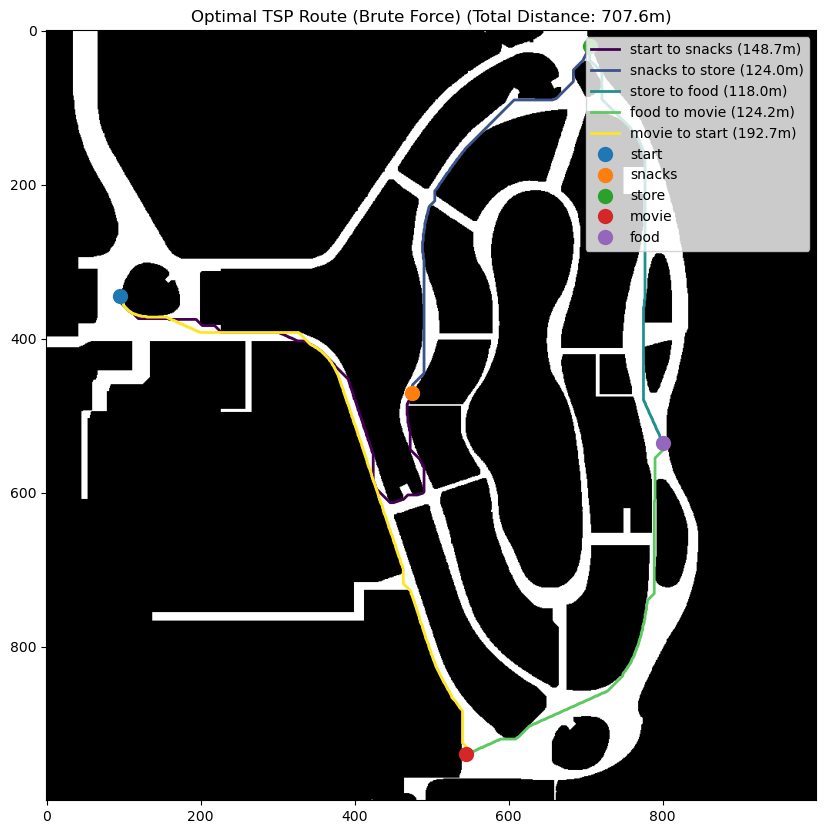

In [30]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Brute-force solution to the Travelling Salesman Problem (TSP)
def brute_force_tsp(distance_table, locations):
    # Create a list of all location names
    nodes = list(locations.keys())
    # Define the starting point (e.g., 'start')
    start_node = 'start'
    # Remove the start node from the list of nodes to permute
    nodes.remove(start_node)
    # Initialize the minimum distance with infinity
    min_distance = float('inf')
    # Initialize variable to store the best route found
    best_route = None
    
    # Iterate through all possible permutations of the other nodes
    for perm in itertools.permutations(nodes):
        # Form a complete route starting and ending at the start node
        route = [start_node] + list(perm) + [start_node]
        # Initialize total distance for this route
        total_distance = 0.0
        # Calculate the total distance of the current route
        for i in range(len(route) - 1):
            total_distance += distance_table[route[i]][route[i + 1]]
        # If the current route is shorter than the best found so far, update it
        if total_distance < min_distance:
            min_distance = total_distance
            best_route = route
    # Return the shortest route and its total distance# Return the shortest route and its total distance
    return best_route, min_distance

# Nearest Neighbor heuristic for TSP
def nearest_neighbor_tsp(distance_table, locations):
    # Get list of all nodes
    nodes = list(locations.keys())
    # Define the starting node
    start_node = 'start'
    # Create a copy of nodes and remove the starting point
    unvisited = nodes.copy()
    unvisited.remove(start_node)
    # Initialize the route and tracking variables
    current_node = start_node
    route = [start_node]
    total_distance = 0.0
    # While there are still nodes left to visit
    while unvisited:
        min_dist = float('inf')
        next_node = None
        # Find the closest unvisited node
        for node in unvisited:
            dist = distance_table[current_node][node]
            if dist < min_dist:
                min_dist = dist
                next_node = node
         # Move to the nearest node
        route.append(next_node)
        total_distance += min_dist
        unvisited.remove(next_node)
        current_node = next_node
    # Return to the starting point to complete the cycle
    total_distance += distance_table[current_node][start_node]
    route.append(start_node)
    
    return route, total_distance

# Visualize the TSP route on the map
def plot_tsp_path(map_data, route, locations, distance_table, title):
    plt.figure(figsize=(10, 10)) # Set figure size
    plt.imshow(map_data, cmap='gray') # Display grayscale map
    color_map = cm.get_cmap('viridis', len(route) - 1) # Create a colormap for different segments
    
    total_distance = 0.0
    # Draw the path between each pair of locations in the route
    for i in range(len(route) - 1):
        start_name = route[i]
        goal_name = route[i + 1]
        start_pos = locations[start_name]
        goal_pos = locations[goal_name]
        # Use A* to get the actual path between two locations
        path, _, _, _ = a_star(map_data, tuple(start_pos), tuple(goal_pos))  
        if path:
            path = np.array(path)
            plt.plot(path[:, 1], path[:, 0], color=color_map(i), linewidth=2, 
                     label=f"{start_name} to {goal_name} ({distance_table[start_name][goal_name]:.1f}m)")
        total_distance += distance_table[start_name][goal_name]
    # Mark all the location points on the map
    for name, pos in locations.items():
        plt.plot(pos[1], pos[0], 'o', label=name, markersize=10)
    # Set title and legend
    plt.title(f"{title} (Total Distance: {total_distance:.1f}m)")
    plt.legend(loc='upper right')
    plt.show()

print("\nTask 2: Travelling Shopper Problem") # Task label
# Run brute force TSP and print result
bf_route, bf_distance = brute_force_tsp(distance_table, locations)
print("Brute Force Route:", " -> ".join(bf_route))
print(f"Brute Force Total Distance:{bf_distance:.2f}", "meters")

# Run nearest neighbor TSP and print result
nn_route, nn_distance = nearest_neighbor_tsp(distance_table, locations)
print("Nearest Neighbor Route:", " -> ".join(nn_route))
print(f"Nearest Neighbor Total Distance:{nn_distance:.2f}", "meters")

# Compare the two methods
print("\nComparison:")
if bf_distance < nn_distance:
    print(f"Brute Force wins by {(nn_distance - bf_distance):.1f} meters")
else:
    print(f"Nearest Neighbor wins by {(bf_distance - nn_distance):.1f} meters")

# Visualize the optimal path (brute force result is guaranteed to be the best)
plot_tsp_path(inflated_map, bf_route, locations, distance_table, "Optimal TSP Route (Brute Force)")

## Task 3

In [31]:
"https://github.com/RicardoCDUT/ME5413_homework3_code.git"

'https://github.com/RicardoCDUT/ME5413_homework3_code.git'